In [2]:
#### this is R

In [3]:
## Load Seurat and other libraries
library(dplyr)
library(Seurat)
library(cowplot)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: ggplot2

Attaching package: ‘cowplot’

The following object is masked from ‘package:ggplot2’:

    ggsave



In [4]:
#### load dataset
gf.data <- Read10X(data.dir = "./ChuLab/september/GF/")

In [5]:
# Initialize the Seurat object with the raw (non-normalized data).
gf <- CreateSeuratObject(counts = gf.data, project = "gf_test", min.cells = 3, min.features = 200)
gf

An object of class Seurat 
14111 features across 7646 samples within 1 assay 
Active assay: RNA (14111 features)

In [6]:
gf@version

[1] ‘3.0.0’

In [7]:
# The [[ operator can add columns to object metadata. This is a great place to stash QC stats
#gf[["percent.mt"]] <- PercentageFeatureSet(gf, pattern = "^MT-")
par(mfrow = c(1,2))

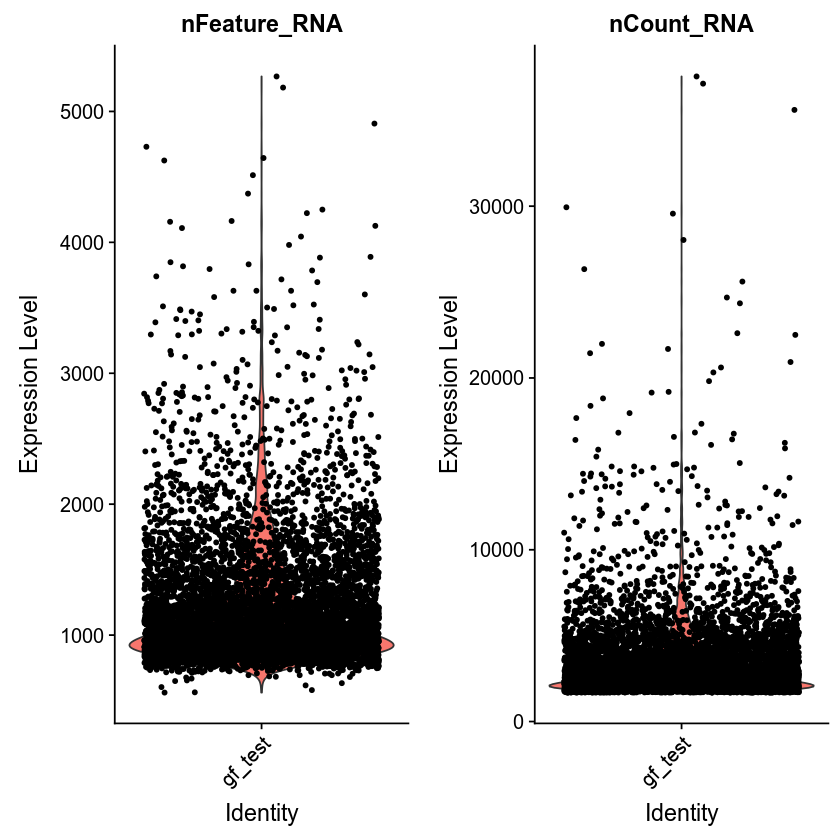

In [8]:
# Visualize QC metrics as a violin plot
VlnPlot(gf, features = c("nFeature_RNA", "nCount_RNA"), ncol = 2)

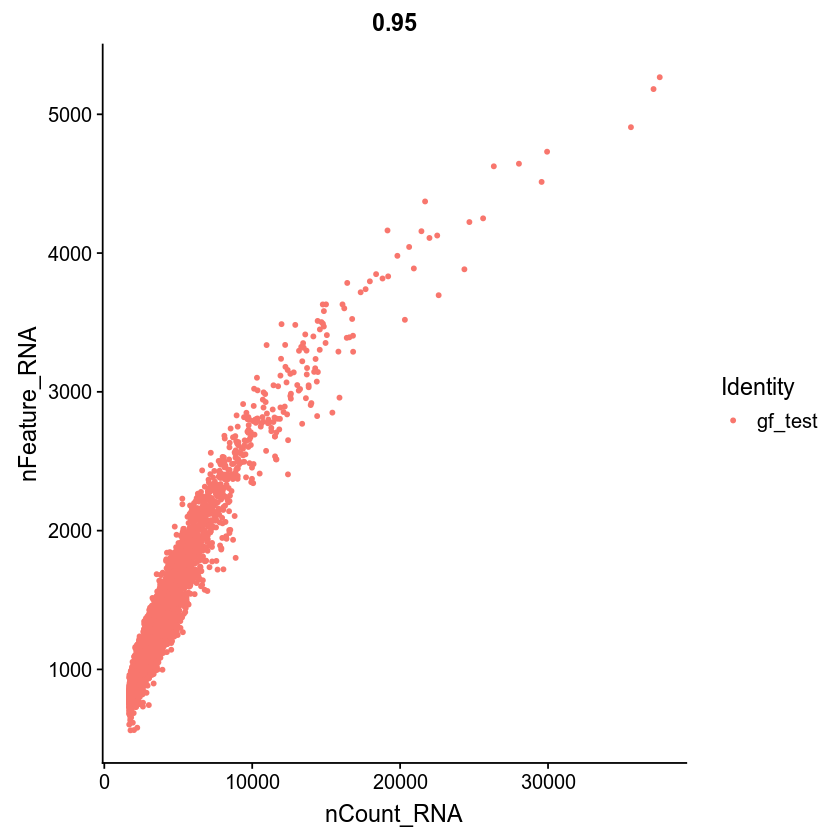

In [9]:
# FeatureScatter is typically used to visualize feature-feature relationships, but can be used
# for anything calculated by the object, i.e. columns in object metadata, PC scores etc.

plot1 <- FeatureScatter(gf, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
#plot2 <- FeatureScatter(gf, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
CombinePlots(plots = list(plot1))

In [10]:
#### subset data
gf <- subset(gf, subset = nFeature_RNA > 200 & nFeature_RNA < 2500) # & percent.mt < 5

In [11]:
gf <- NormalizeData(gf, normalization.method = "LogNormalize", scale.factor = 10000)

In [12]:
gf <- FindVariableFeatures(gf, selection.method = "vst", nfeatures = 2000) #takes 2000 most variable genes

# Identify the 10 most highly variable genes
top10 <- head(VariableFeatures(gf), 10)

In [13]:
top10 # list of most variable genes

[1] "Ccl5"    "Gzma"    "Fscn1"   "Tyrobp"  "Lyz2"    "Siglech" "Apol7c" 
 [8] "Apoe"    "Cox6a2"  "Ly6c2"

Warning message:
“Transformation introduced infinite values in continuous x-axis”

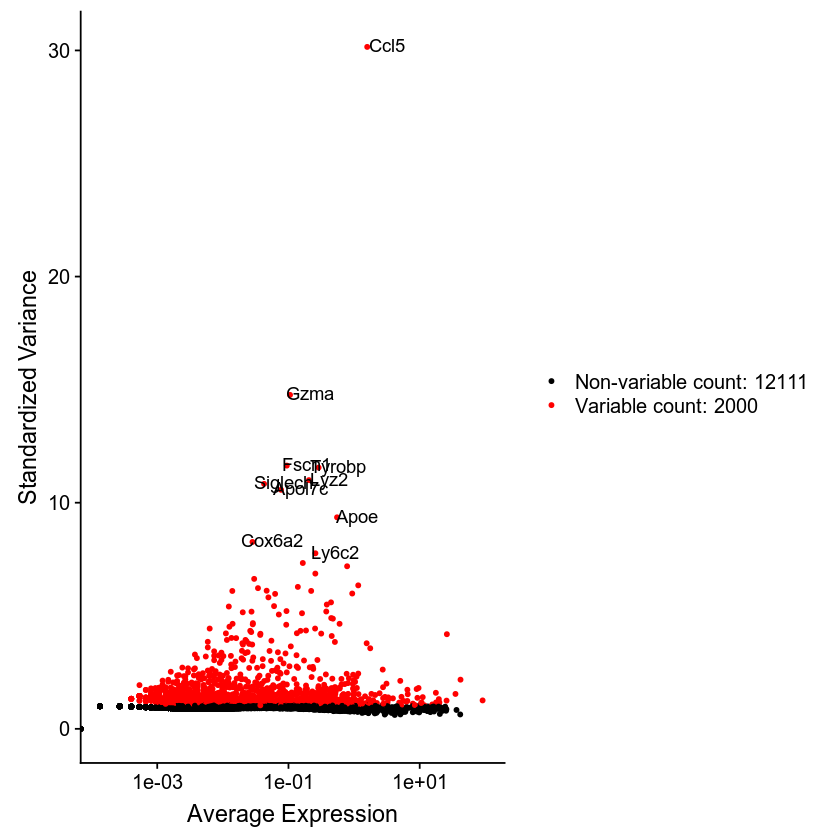

In [14]:
# plot variable features with and without labels
plot1 <- VariableFeaturePlot(gf) + expand_limits(x=c(0.001,100), y=c(0, 30))
plot2 <- LabelPoints(plot = plot1, points = top10, repel = FALSE) #repel true does not work, x axis is squeezed
CombinePlots(plots = list(plot2))


#### this doesn't work, avoid doing the MT- thing. 
### the problem is the plotting area.
### read ggplot2 documentation to fix this.

In [15]:
all.genes <- rownames(gf)

In [16]:
gf <- ScaleData(gf, features = all.genes)

Centering and scaling data matrix


In [17]:
gf <- RunPCA(gf, features = VariableFeatures(object = gf))

PC_ 1 
Positive:  Cd74, H2-Aa, H2-Eb1, Cd79a, H2-Ab1, Ebf1, Cd79b, Mef2c, Ms4a1, Ly6d 
	   H2-DMb2, Gm43603, Bank1, Siglecg, H2-DMa, Napsa, Fcmr, Fcer2a, Tnfrsf13c, Mzb1 
	   H2-Ob, Irf8, Ctsh, Vpreb3, H2-Oa, Hvcn1, Bcl11a, Ralgps2, Cd24a, Serinc3 
Negative:  Cd3g, Cd3d, Lck, Ms4a4b, Rgs10, Lat, Fxyd5, Ms4a6b, Cd3e, Fyb 
	   Skap1, Ccnd2, Lef1, Bcl11b, Thy1, Tcf7, Arl4c, Ramp1, Saraf, Selplg 
	   Hcst, Cd247, Cd28, Igfbp4, Txk, Izumo1r, AW112010, Rinl, Prkcq, Tmsb10 
PC_ 2 
Positive:  Tmsb10, Rps18, Igfbp4, Lef1, Rpl32, Rplp1, Malat1, Dapl1, Klf2, S1pr1 
	   Cd3g, Satb1, Cd3d, Ms4a4b, Bcl11b, Rpl10a, Lat, Ms4a6b, Gm12840, Lck 
	   Cd52, Rpl22l1, Thy1, Il6ra, Rps2, Dgka, Atp1b3, Rplp0, Rpl3, Cd3e 
Negative:  Fcer1g, Tyrobp, Fscn1, Anxa3, Tmem176a, Apol7c, Tmem176b, Cxcl16, Bcl2a1a, Ccl5 
	   Cacnb3, Serpinb6b, Id2, Gadd45b, Hmgn3, Batf3, Cd63, Basp1, Ccl22, Mpeg1 
	   Csf2rb, Cst3, Anxa2, Grn, Bcl2a1d, S100a4, Socs2, Ogfrl1, Alox5ap, Nudt17 
PC_ 3 
Positive:  Tnfrsf4, Fscn1, Tbc1d4, Cxc

In [18]:
# Examine and visualize PCA results a few different ways
print(gf[["pca"]], dims = 1:5, nfeatures = 5)

PC_ 1 
Positive:  Cd74, H2-Aa, H2-Eb1, Cd79a, H2-Ab1 
Negative:  Cd3g, Cd3d, Lck, Ms4a4b, Rgs10 
PC_ 2 
Positive:  Tmsb10, Rps18, Igfbp4, Lef1, Rpl32 
Negative:  Fcer1g, Tyrobp, Fscn1, Anxa3, Tmem176a 
PC_ 3 
Positive:  Tnfrsf4, Fscn1, Tbc1d4, Cxcl16, Bcl2a1b 
Negative:  Fcer1g, Klrd1, Klrk1, Cd7, Nkg7 
PC_ 4 
Positive:  Aicda, 2810417H13Rik, Jchain, Eaf2, Anp32b 
Negative:  Fscn1, Apol7c, Anxa3, Cxcl16, Cacnb3 
PC_ 5 
Positive:  Malat1, Mpeg1, Ctsl, Izumo1r, Siglech 
Negative:  Nkg7, Klrk1, Ccl5, Klrb1c, Klre1 


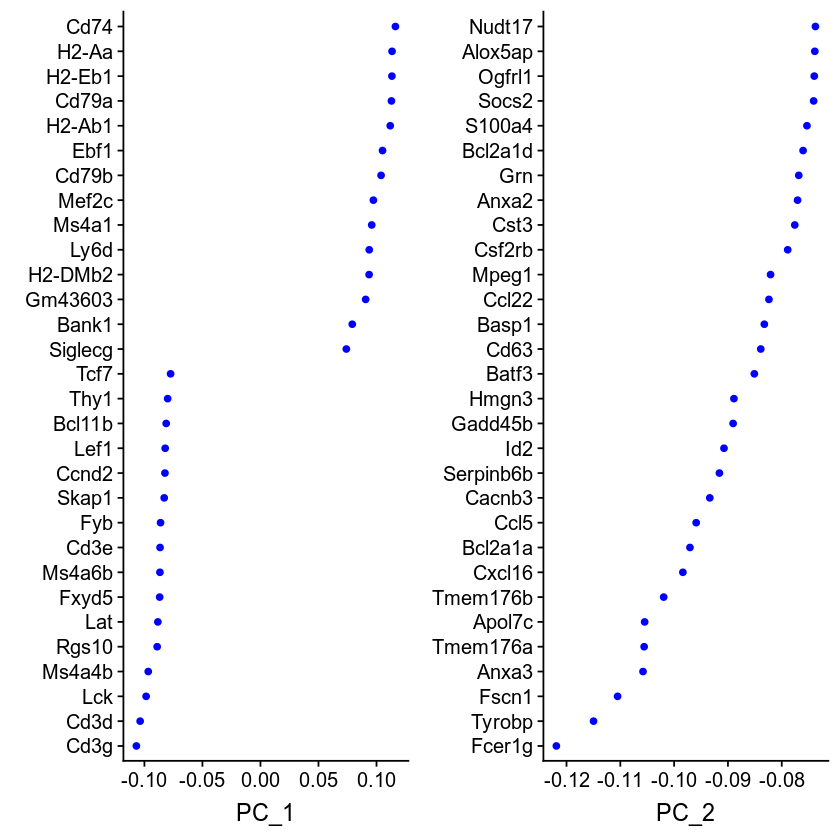

In [19]:
VizDimLoadings(gf, dims = 1:2, reduction = "pca")

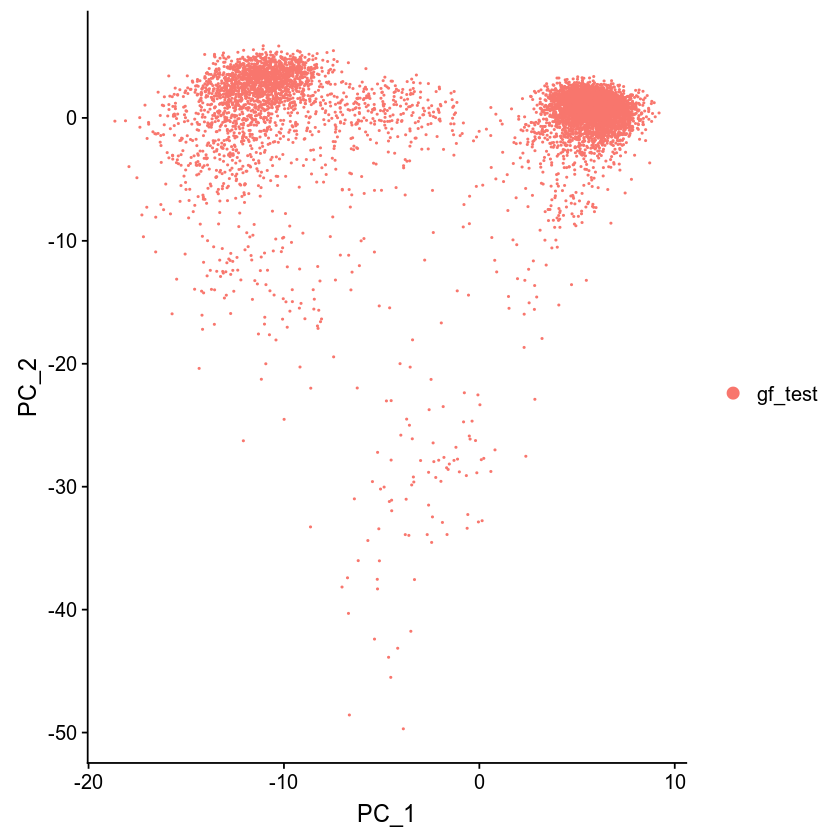

In [20]:
DimPlot(gf, reduction = "pca")

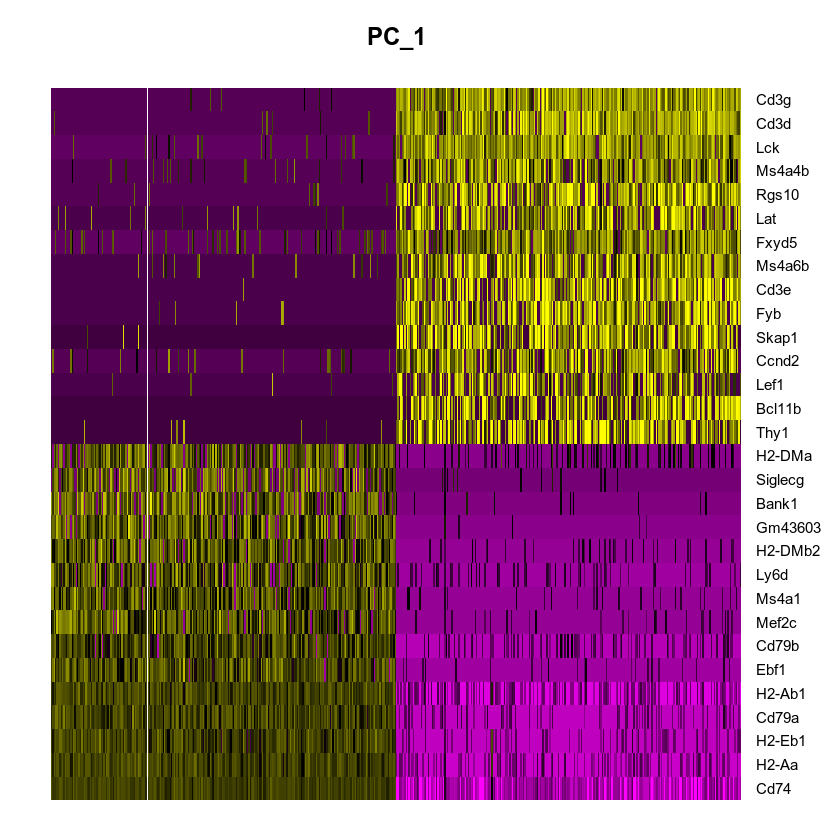

In [21]:
DimHeatmap(gf, dims = 1, cells = 500, balanced = TRUE)

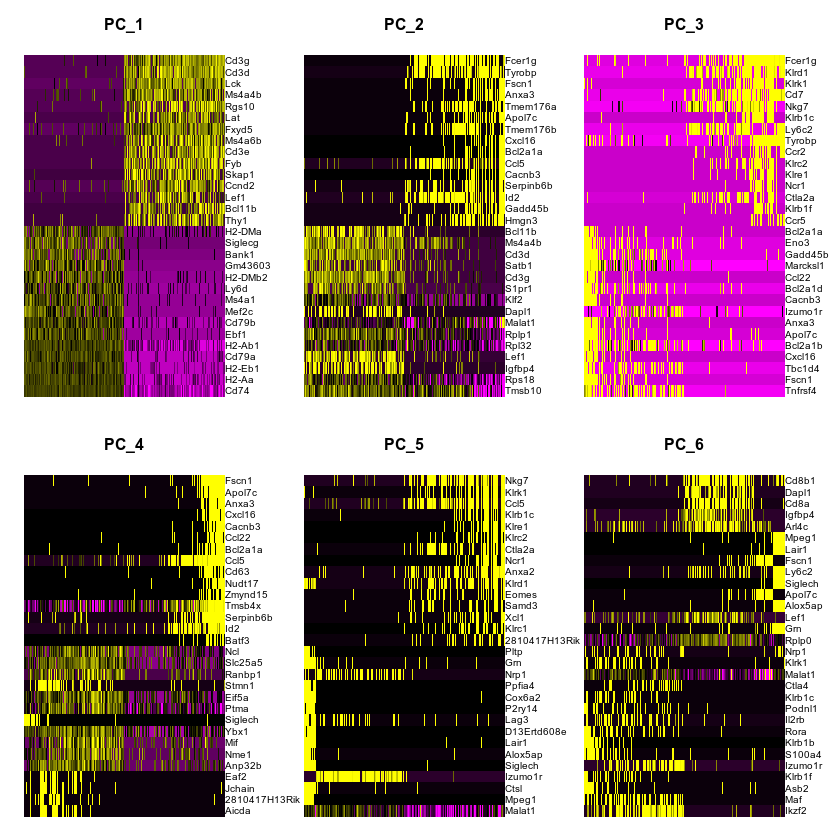

In [22]:
DimHeatmap(gf, dims = 1:6, cells = 500, balanced = TRUE)

In [23]:
gf <- FindNeighbors(gf, dims = 1:10)
gf <- FindClusters(gf, resolution = 0.5)

Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 7462
Number of edges: 240523

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8568
Number of communities: 12
Elapsed time: 6 seconds


In [24]:
# Look at cluster IDs of the first 5 cells
head(Idents(gf), 5)

AAACCTGAGACAGAGA AAACCTGAGGAGTTGC AAACCTGAGTAGCGGT AAACCTGAGTGTTAGA 
               1                2                8                2 
AAACCTGCAACTGCTA 
               1 
Levels: 0 1 2 3 4 5 6 7 8 9 10 11

In [25]:
gf <- RunUMAP(gf, dims = 1:10)

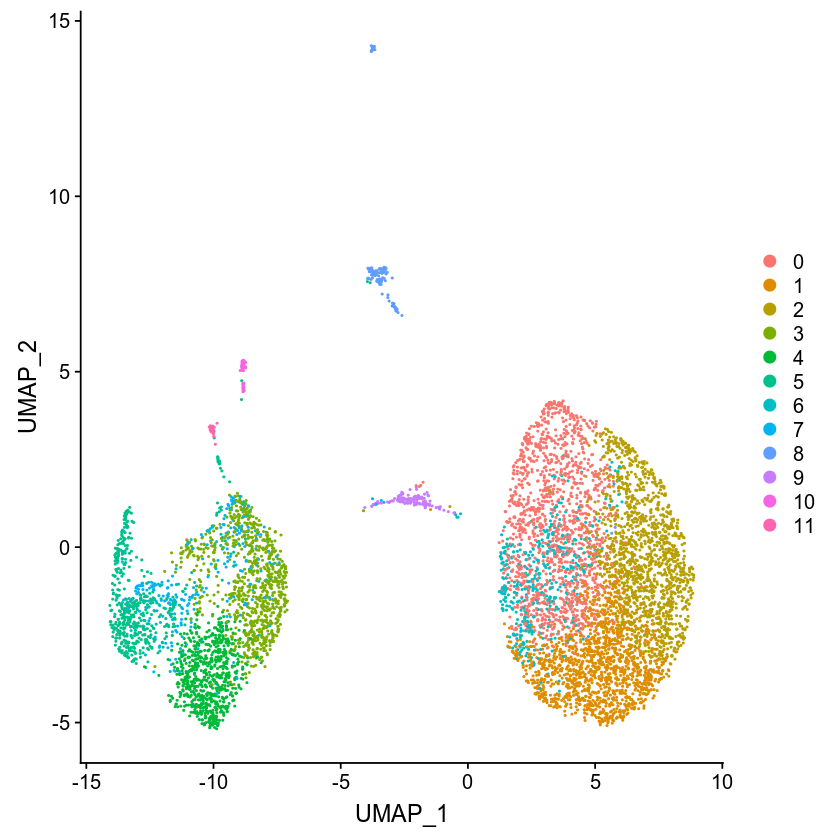

In [26]:
# note that you can set `label = TRUE` or use the LabelClusters function to help label
# individual clusters
DimPlot(gf, reduction = "umap")

In [28]:
saveRDS(gf, file = "./output/gf_test.rds") ### save to ./ChuLab/

In [29]:
# find all markers of cluster 1
cluster1.markers <- FindMarkers(gf, ident.1 = 1, min.pct = 0.25)
head(cluster1.markers, n = 5)

,p_val,avg_logFC,pct.1,pct.2,p_val_adj
Rplp0,1.070148e-265,-0.5174549,0.996,1.000,1.510086e-261
Cd79a,1.926444e-251,0.6841821,0.998,0.701,2.718406e-247
Ebf1,4.624086e-203,0.6916620,0.958,0.614,6.525048e-199
Cd79b,2.566401e-184,0.6087438,0.973,0.691,3.621449e-180
H3f3a,5.087093e-184,0.4893064,0.995,0.971,7.178397e-180


In [30]:
# find all markers distinguishing cluster 5 from clusters 0 and 3
cluster5.markers <- FindMarkers(gf, ident.1 = 5, ident.2 = c(0, 3), min.pct = 0.25)
head(cluster5.markers, n = 5)

,p_val,avg_logFC,pct.1,pct.2,p_val_adj
Cd8b1,0.000000e+00,2.320362,0.705,0.044,0.000000e+00
Nkg7,0.000000e+00,2.112862,0.872,0.041,0.000000e+00
Cd8a,5.796909e-300,1.507923,0.606,0.015,8.180018e-296
Klrd1,3.443663e-256,1.354395,0.503,0.008,4.859353e-252
Arl4c,2.983091e-242,1.417899,0.754,0.109,4.209440e-238


In [31]:
# find markers for every cluster compared to all remaining cells, report only the positive ones
gf.markers <- FindAllMarkers(gf, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)
gf.markers %>% group_by(cluster) %>% top_n(n = 2, wt = avg_logFC)

Calculating cluster 0
Calculating cluster 1
Calculating cluster 2
Calculating cluster 3
Calculating cluster 4
Calculating cluster 5
Calculating cluster 6
Calculating cluster 7
Calculating cluster 8
Calculating cluster 9
Calculating cluster 10
Calculating cluster 11


p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster,gene
3.683982e-209,0.9956115,0.710,0.333,5.198467e-205,0,Cd83
1.690570e-136,0.9423758,0.559,0.266,2.385564e-132,0,Samsn1
4.624086e-203,0.6916620,0.958,0.614,6.525048e-199,1,Ebf1
5.766207e-98,0.6851699,0.514,0.284,8.136694e-94,1,Cd55
1.225155e-76,0.6711381,0.506,0.276,1.728816e-72,2,Plac8
2.676664e-27,0.6043082,0.264,0.154,3.777040e-23,2,Apoe
0.000000e+00,1.8601161,0.640,0.059,0.000000e+00,3,Ikzf2
0.000000e+00,1.8570087,0.750,0.078,0.000000e+00,3,Izumo1r
0.000000e+00,1.6403783,0.681,0.115,0.000000e+00,4,Igfbp4
0.000000e+00,1.3529779,0.793,0.186,0.000000e+00,4,Lef1


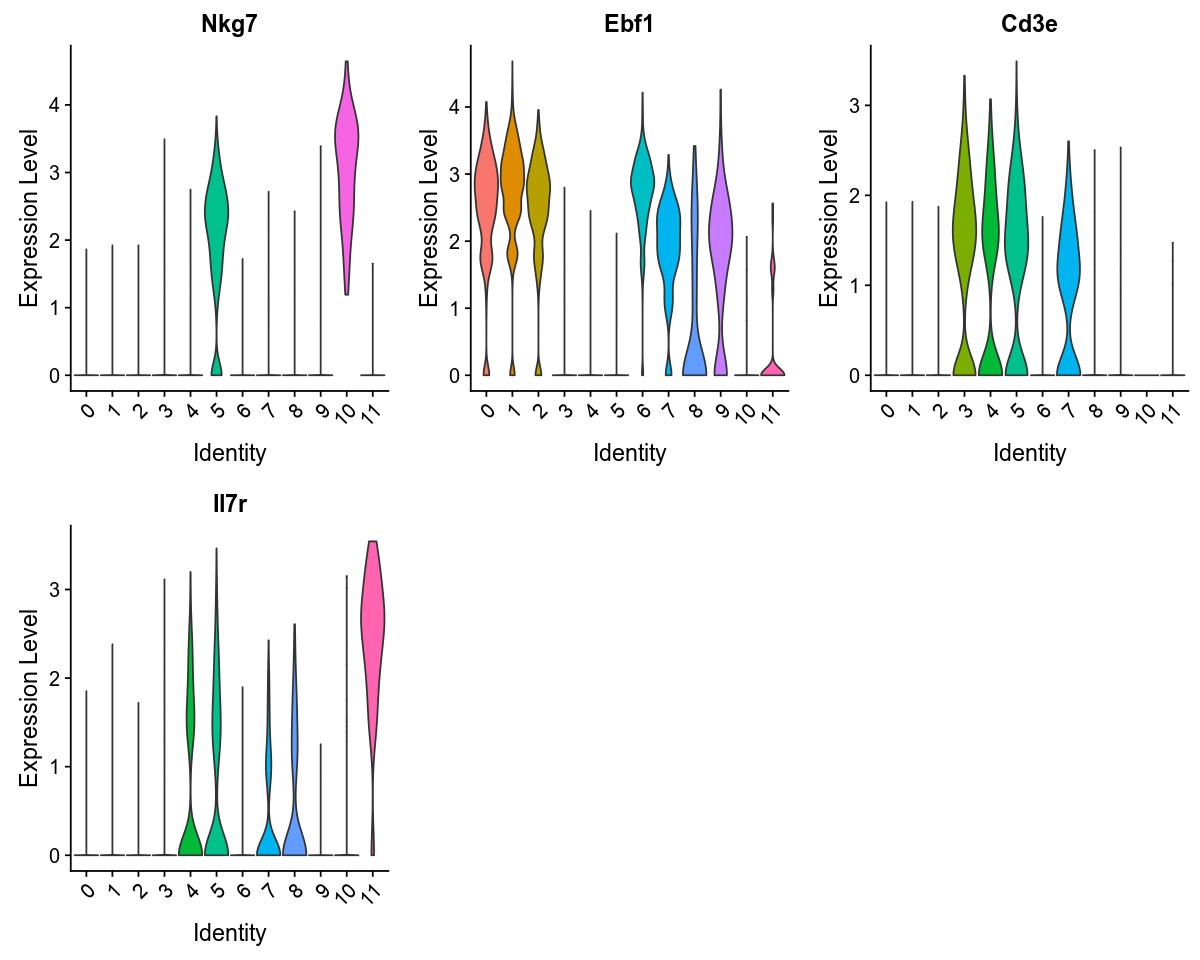

In [48]:
options(repr.plot.width=10, repr.plot.height=8) ### square
VlnPlot(gf, features = c("Nkg7", "Ebf1", "Cd3e", "Il7r"), pt.size = FALSE)

In [38]:
options(repr.plot.width=10, repr.plot.height=4) ### edit size

In [40]:
write.csv(gf.markers, file = "./output/gf_cluster_markers.csv") ### saving matrix of cluster markers. These are a lot...

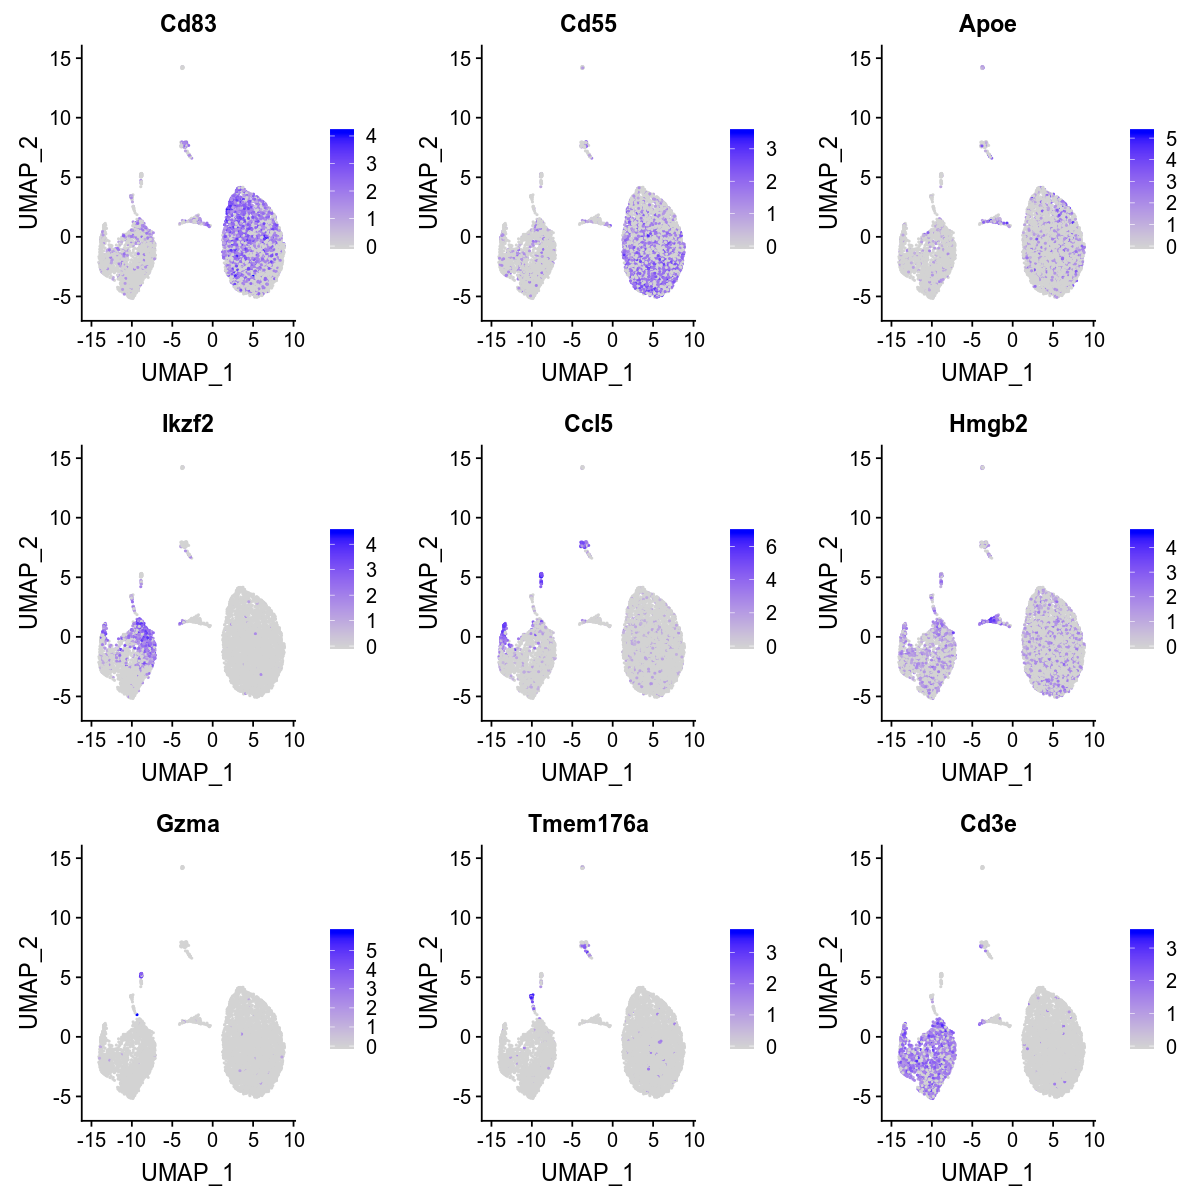

In [43]:
options(repr.plot.width=10, repr.plot.height=10) ### edit size
FeaturePlot(gf, features = c(
    "Cd83", "Cd55", "Apoe", "Ikzf2", 
    "Ccl5", "Hmgb2", "Gzma", "Tmem176a", "Cd3e"))

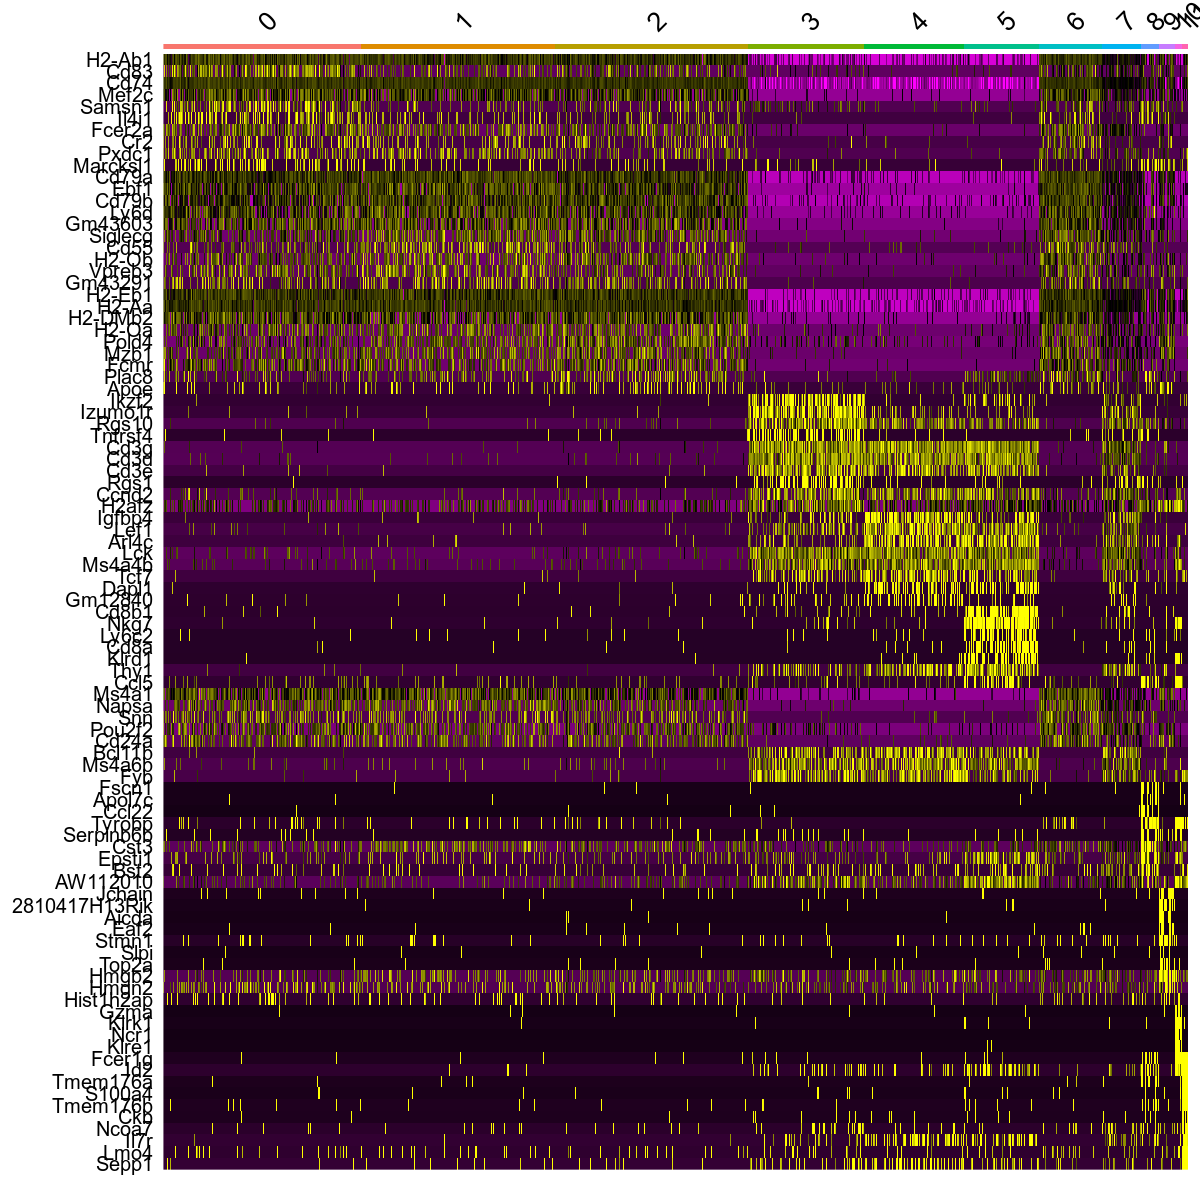

In [42]:
top10 <- gf.markers %>% group_by(cluster) %>% top_n(n = 10, wt = avg_logFC)
DoHeatmap(gf, features = top10$gene) + NoLegend()

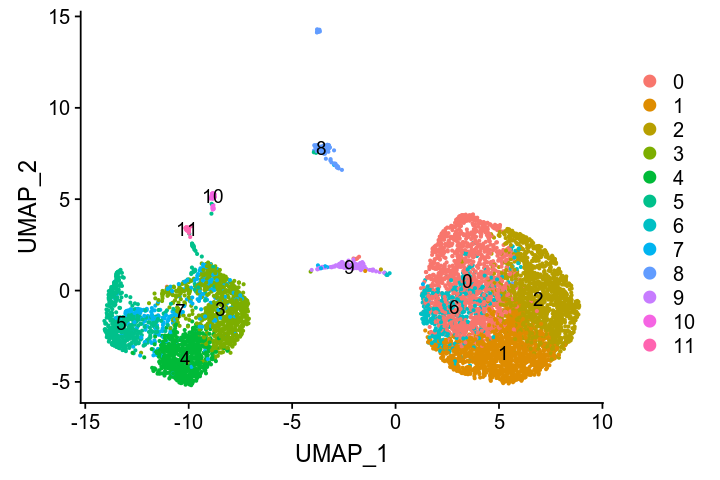

In [49]:
options(repr.plot.width=6, repr.plot.height=4) ### edit size
DimPlot(gf, reduction = "umap", label = TRUE, pt.size = 0.5)

In [56]:
new.cluster.ids <- c(
    "Macrophages?", "B cells?", "More B cells?", 
    "T1", "T2", "T3", 
    "B again??", "CD8+", 
    "?", "??", "???", "????", "¿?")

Warning message:
“Cannot find identity NA”Warning message:
“Cannot find identity NA”Warning message:
“Cannot find identity NA”

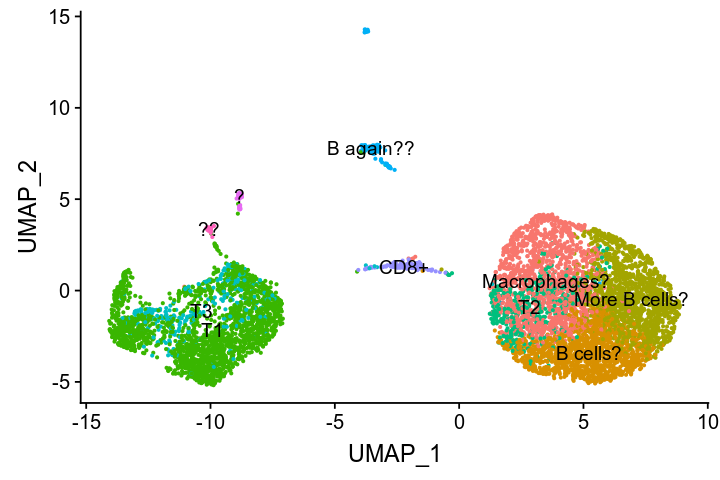

In [57]:
names(new.cluster.ids) <- levels(gf)
gf <- RenameIdents(gf, new.cluster.ids)
DimPlot(gf, reduction = "umap", label = TRUE, pt.size = 0.5) + NoLegend()

In [58]:
saveRDS(gf, file = "./ChuLab/output/gf_test_final.rds") ### save to ./ChuLab/

In [59]:
head(all.genes)

[1] "Mrpl15"  "Lypla1"  "Gm37988" "Tcea1"   "Atp6v1h" "Rb1cc1"

In [60]:
write.csv(all.genes, file = "./ChuLab/output/all_genes_gf.csv")